In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from datetime import datetime, timedelta
%matplotlib inline
import pyomo.environ as pyo
from scenario1 import model 

In [2]:
data = pd.read_excel('data.xlsx')
data.head()

,Unnamed: 0,Demand (kW),Unnamed: 2,Unnamed: 3,Solar Generation (kW),Unnamed: 5,Unnamed: 6,Electricity Price (p/kWh),Unnamed: 8
0,NaN,H1,H2,H3,H1,H2,H3,Import,Export
1,00:00:00,0.452,0.5,0.188,0,0,0,10.3425,3.86
2,00:30,0.32,0.352,0.092,0,0,0,10.5735,3.82
3,01:00,0.372,0.36,0.184,0,0,0,10.668,3.82
4,01:30,0.208,0.232,0.084,0,0,0,10.185,3.82


In [3]:
T = 48
delta_t = 0.5
demand_h1 = data.iloc[1:, 1] # demand for house 1
demand_h2 = data.iloc[1:, 2] # demand for house 2
demand_h3 = data.iloc[1:, 3] # demand for house 3 

pv_h1 = data.iloc[1:, 4] # pv for house 1
pv_h2 = data.iloc[1:, 5] # pv for house 2
pv_h3 = data.iloc[1:, 6] # pv for house 3

ele_import_price = data.iloc[1:, 7] # electricity import price
ele_export_price = data.iloc[1:, 8] # electricity export price

# House 1

In [4]:
house1 = model.create_instance("house1.dat", namespace="base")

In [5]:
for t in range(1,T+1):
    house1.d._data[t].value = demand_h1[t]
    house1.q_pv._data[t].value = pv_h1[t]
    house1.pi_import._data[t].value = ele_import_price[t]
    house1.pi_export._data[t].value = ele_export_price[t]

In [6]:
solver = pyo.SolverFactory('glpk')
solver.solve(house1)

{'Problem': [{'Name': 'unknown', 'Lower bound': 107.486119685185, 'Upper bound': 107.486119685185, 'Number of objectives': 1, 'Number of constraints': 433, 'Number of variables': 336, 'Number of nonzeros': 864, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '33', 'Number of created subproblems': '33'}}, 'Error rc': 0, 'Time': 0.010235786437988281}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

## Visualisation -- House 1

In [7]:
for t in range(1,T+1):
    print(f"t={t}, p_c={house1.p_c._data[t].value}, p_d={house1.p_d._data[t].value}, q_import={house1.q_import._data[t].value}, q_export={house1.q_export._data[t].value}")

t=1, p_c=-0.0, p_d=-0.0, q_import=0.226, q_export=0.0
t=2, p_c=-0.0, p_d=-0.0, q_import=0.16, q_export=0.0
t=3, p_c=-0.0, p_d=-0.0, q_import=0.186, q_export=0.0
t=4, p_c=-0.0, p_d=-0.0, q_import=0.104, q_export=0.0
t=5, p_c=-0.0, p_d=-0.0, q_import=0.15, q_export=0.0
t=6, p_c=-0.0, p_d=-0.0, q_import=0.188, q_export=0.0
t=7, p_c=-0.0, p_d=-0.0, q_import=0.104, q_export=0.0
t=8, p_c=-0.0, p_d=-0.0, q_import=0.138, q_export=0.0
t=9, p_c=-0.0, p_d=-0.0, q_import=0.154, q_export=0.0
t=10, p_c=0.532370370370363, p_d=-0.0, q_import=0.334185185185182, q_export=0.0
t=11, p_c=-0.0, p_d=-0.0, q_import=0.098, q_export=0.0
t=12, p_c=-0.0, p_d=-0.0, q_import=0.157, q_export=0.0
t=13, p_c=-0.0, p_d=-0.0, q_import=0.052, q_export=0.0
t=14, p_c=-0.0, p_d=-0.0, q_import=0.054, q_export=0.0
t=15, p_c=-0.0, p_d=-0.0, q_import=0.088, q_export=0.0
t=16, p_c=0.082, p_d=-0.0, q_import=-0.0, q_export=0.0
t=17, p_c=-0.0, p_d=-0.0, q_import=0.342, q_export=0.0
t=18, p_c=-0.0, p_d=-0.0, q_import=0.138, q_export=

In [8]:
for t in range(1,T+1):
    print(f"t={t}, E={house1.E._data[t].value}")

t=1, E=1.999
t=2, E=1.998
t=3, E=1.997
t=4, E=1.996
t=5, E=1.995
t=6, E=1.994
t=7, E=1.993
t=8, E=1.992
t=9, E=1.991
t=10, E=2.22956666666666
t=11, E=2.22856666666666
t=12, E=2.22756666666666
t=13, E=2.22656666666667
t=14, E=2.22556666666667
t=15, E=2.22456666666667
t=16, E=2.26046666666667
t=17, E=2.25946666666667
t=18, E=2.25846666666667
t=19, E=2.30066666666667
t=20, E=2.29966666666667
t=21, E=2.29866666666667
t=22, E=2.31116666666667
t=23, E=2.49016666666667
t=24, E=2.77626666666667
t=25, E=2.78966666666667
t=26, E=2.78866666666667
t=27, E=2.78766666666667
t=28, E=2.78666666666667
t=29, E=2.78566666666667
t=30, E=2.78466666666667
t=31, E=3.68366666666667
t=32, E=3.68266666666667
t=33, E=3.09944444444444
t=34, E=2.74511111111111
t=35, E=2.553
t=36, E=2.22977777777778
t=37, E=1.85766666666667
t=38, E=1.34777777777778
t=39, E=1.109
t=40, E=1.108
t=41, E=1.107
t=42, E=1.106
t=43, E=1.105
t=44, E=1.104
t=45, E=1.103
t=46, E=2.002
t=47, E=2.001
t=48, E=2.0


In [9]:
p_c_h1 = [house1.p_c._data[t].value for t in range(1,T+1)]
p_d_h1 = [house1.p_d._data[t].value for t in range(1,T+1)]
E_h1 = [house1.E._data[t].value for t in range(1,T+1)]
q_import_h1 = [house1.q_import._data[t].value for t in range(1,T+1)]
q_export_h1 = [house1.q_export._data[t].value for t in range(1,T+1)]

d_h1 = [house1.d._data[t].value for t in range(1,T+1)]
q_pv_h1 = [house1.q_pv._data[t].value for t in range(1,T+1)]

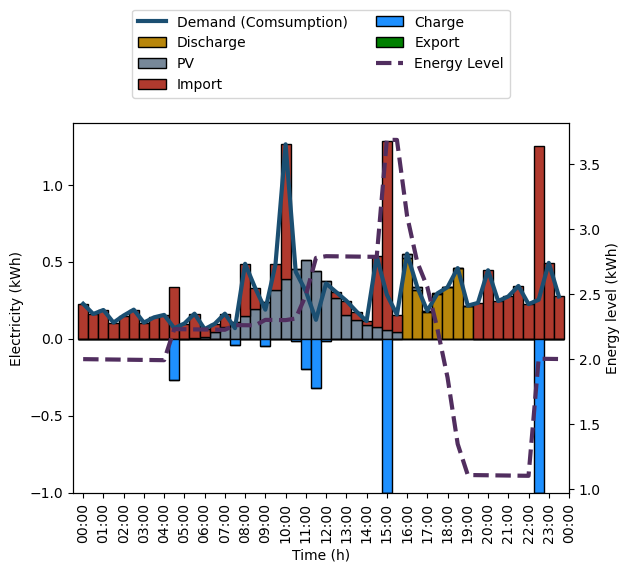

In [10]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(d_h1)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

ax1.bar(time_range, np.array(p_d_h1)*delta_t, width=bar_width, label="Discharge", color="#B8860B", edgecolor="black")

ax1.bar(time_range, np.array(q_pv_h1)*delta_t, bottom=np.array(p_d_h1)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

ax1.bar(time_range, np.array(q_import_h1), bottom=np.array(q_pv_h1)*delta_t + np.array(p_d_h1)*delta_t, width=bar_width, align='center', label="Import", color="#B03A2E", edgecolor="black")

ax1.bar(time_range, np.negative(p_c_h1)*delta_t, width=bar_width, label="Charge", color="#1E90FF", edgecolor="black")

ax1.bar(time_range, np.negative(q_export_h1), bottom=np.negative(p_c_h1)*delta_t, width=bar_width, label="Export", color="#008000", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)")

# Second y-axis
ax2 = ax1.twinx() 
ax2.plot(time_range, np.array(E_h1), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
ax2.set_ylabel("Energy level (kWh)")
# ax2.legend()

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
ax1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("house1.pdf", bbox_inches='tight')
plt.show()

# House 2

In [11]:
house2 = model.create_instance("house2.dat", namespace="base")

In [12]:
for t in range(1,T+1):
    house2.d._data[t].value = demand_h2[t]
    house2.q_pv._data[t].value = pv_h2[t]
    house2.pi_import._data[t].value = ele_import_price[t]
    house2.pi_export._data[t].value = ele_export_price[t]

In [13]:
solver = pyo.SolverFactory('glpk')
solver.solve(house2)

{'Problem': [{'Name': 'unknown', 'Lower bound': 172.21785882716, 'Upper bound': 172.21785882716, 'Number of objectives': 1, 'Number of constraints': 433, 'Number of variables': 336, 'Number of nonzeros': 864, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '21', 'Number of created subproblems': '21'}}, 'Error rc': 0, 'Time': 0.026851177215576172}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

## Visualisation -- House 2

In [14]:
p_c_h2 = [house2.p_c._data[t].value for t in range(1,T+1)]
p_d_h2 = [house2.p_d._data[t].value for t in range(1,T+1)]
E_h2 = [house2.E._data[t].value for t in range(1,T+1)]
q_import_h2 = [house2.q_import._data[t].value for t in range(1,T+1)]
q_export_h2 = [house2.q_export._data[t].value for t in range(1,T+1)]

d_h2 = [house2.d._data[t].value for t in range(1,T+1)]
q_pv_h2 = [house2.q_pv._data[t].value for t in range(1,T+1)]

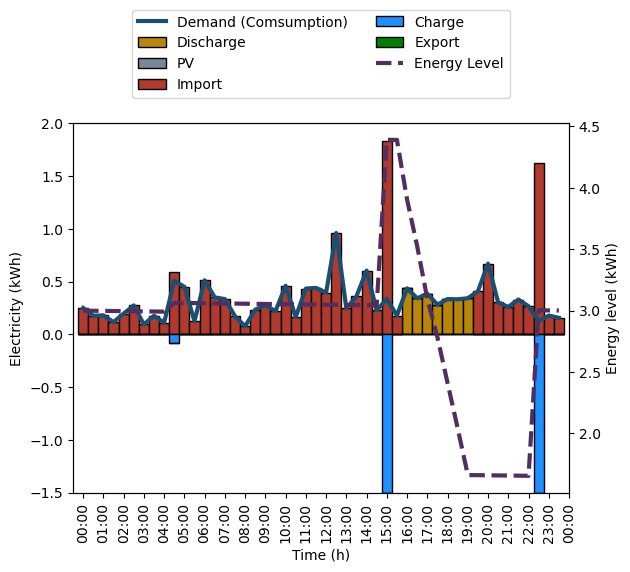

In [15]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(d_h2)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

ax1.bar(time_range, np.array(p_d_h2)*delta_t, width=bar_width, label="Discharge", color="#B8860B", edgecolor="black")

ax1.bar(time_range, np.array(q_pv_h2)*delta_t, bottom=np.array(p_d_h2)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

ax1.bar(time_range, np.array(q_import_h2), bottom=np.array(q_pv_h2)*delta_t + np.array(p_d_h2)*delta_t, width=bar_width, align='center', label="Import", color="#B03A2E", edgecolor="black")

ax1.bar(time_range, np.negative(p_c_h2)*delta_t, width=bar_width, label="Charge", color="#1E90FF", edgecolor="black")

ax1.bar(time_range, np.negative(q_export_h2), bottom=np.negative(p_c_h2)*delta_t, width=bar_width, label="Export", color="#008000", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)")

# Second y-axis
ax2 = ax1.twinx() 
ax2.plot(time_range, np.array(E_h2), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
ax2.set_ylabel("Energy level (kWh)")
# ax2.legend()

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
ax1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("house2.pdf", bbox_inches='tight')
plt.show()

# House 3

In [16]:
house3 = model.create_instance("house3.dat", namespace="base")

In [17]:
for t in range(1,T+1):
    house3.d._data[t].value = demand_h3[t]
    house3.q_pv._data[t].value = pv_h3[t]
    house3.pi_import._data[t].value = ele_import_price[t]
    house3.pi_export._data[t].value = ele_export_price[t]

In [18]:
solver = pyo.SolverFactory('glpk')
solver.solve(house3)

{'Problem': [{'Name': 'unknown', 'Lower bound': 8.65057157777781, 'Upper bound': 8.65057157777781, 'Number of objectives': 1, 'Number of constraints': 433, 'Number of variables': 336, 'Number of nonzeros': 864, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '67', 'Number of created subproblems': '67'}}, 'Error rc': 0, 'Time': 0.016737937927246094}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

## Visualisation -- House 3

In [19]:
p_c_h3 = [house3.p_c._data[t].value for t in range(1,T+1)]
p_d_h3 = [house3.p_d._data[t].value for t in range(1,T+1)]
E_h3 = [house3.E._data[t].value for t in range(1,T+1)]
q_import_h3 = [house3.q_import._data[t].value for t in range(1,T+1)]
q_export_h3 = [house3.q_export._data[t].value for t in range(1,T+1)]

d_h3 = [house3.d._data[t].value for t in range(1,T+1)]
q_pv_h3 = [house3.q_pv._data[t].value for t in range(1,T+1)]

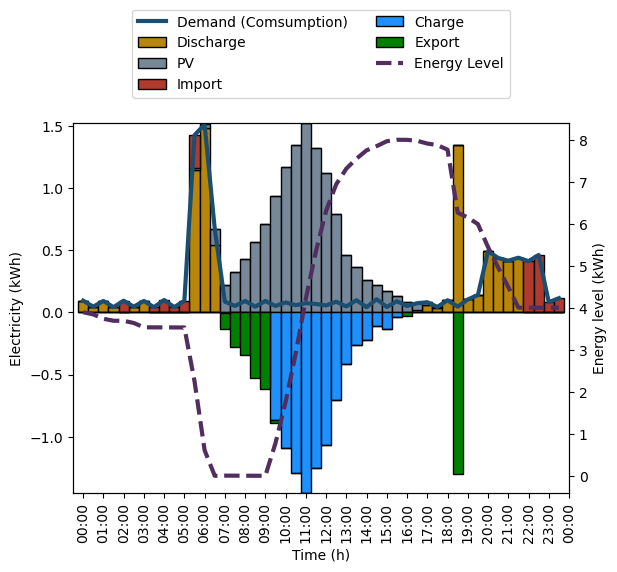

In [20]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(d_h3)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

ax1.bar(time_range, np.array(p_d_h3)*delta_t, width=bar_width, label="Discharge", color="#B8860B", edgecolor="black")

ax1.bar(time_range, np.array(q_pv_h3)*delta_t, bottom=np.array(p_d_h3)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

ax1.bar(time_range, np.array(q_import_h3), bottom=np.array(q_pv_h3)*delta_t + np.array(p_d_h3)*delta_t, width=bar_width, align='center', label="Import", color="#B03A2E", edgecolor="black")

ax1.bar(time_range, np.negative(p_c_h3)*delta_t, width=bar_width, label="Charge", color="#1E90FF", edgecolor="black")

ax1.bar(time_range, np.negative(q_export_h3), bottom=np.negative(p_c_h3)*delta_t, width=bar_width, label="Export", color="#008000", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)")

# Second y-axis
ax2 = ax1.twinx() 
ax2.plot(time_range, np.array(E_h3), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
ax2.set_ylabel("Energy level (kWh)")
# ax2.legend()

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
ax1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("house3.pdf", bbox_inches='tight')
plt.show()